# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extracting the data

In [2]:
def read_data():
    path = 'E:/Random Forest Project 9 & 10/Company_Data.csv'
    data = pd.read_csv(path)
    return data

In [3]:
data = read_data()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# PreProcessing

In [5]:
# Converting the catergorical columns into numerical column using Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label.fit_transform(data[column])

In [10]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

# EDA

### Correlation Heatmap

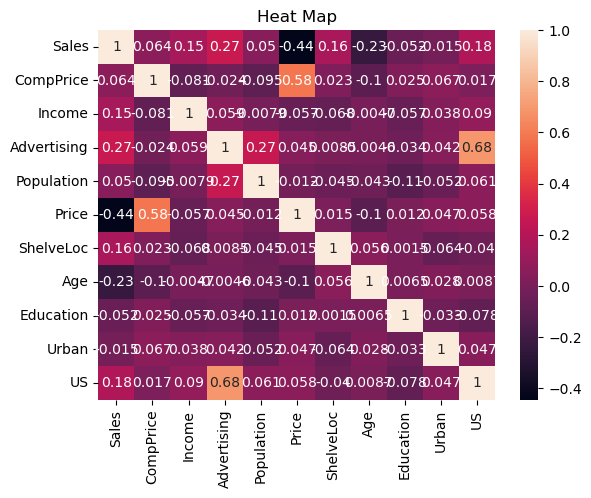

In [11]:
path = 'E:/Random Forest Project 9 & 10'
file_path = os.path.join(path, 'Heat_map.png')
cor = data[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

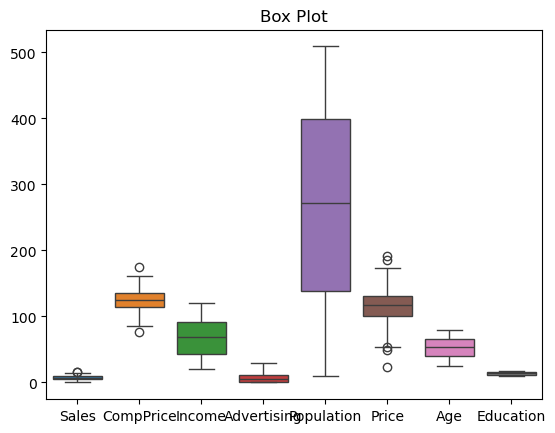

In [40]:
path = 'E:/Random Forest Project 9 & 10'
file_path = os.path.join(path, 'Box_plot.png')
sns.boxplot(data=data[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])
plt.title('Box Plot')
plt.savefig(file_path)
plt.show()

In [ ]:
# There are some outliers in Price, sales and CompPrice

In [42]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Price'] < lower) | (data['Price'] > upper))
data['Price'] = np.where(data['Price'] < lower, lower, data['Price'])
data['Price'] = np.where(data['Price'] > upper, upper, data['Price'])

In [43]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Sales'] < lower) | (data['Sales'] > upper))
data['Sales'] = np.where(data['Sales'] < lower, lower, data['Sales'])
data['Sales'] = np.where(data['Sales'] > upper, upper, data['Sales'])

In [44]:
Q1 = data['CompPrice'].quantile(0.25)
Q3 = data['CompPrice'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['CompPrice'] < lower) | (data['CompPrice'] > upper))
data['CompPrice'] = np.where(data['CompPrice'] < lower, lower, data['CompPrice'])
data['CompPrice'] = np.where(data['CompPrice'] > upper, upper, data['CompPrice'])

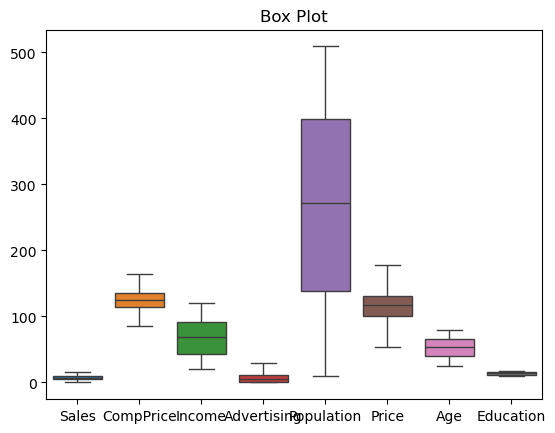

In [73]:
path = 'E:/Random Forest Project 9 & 10'
file_path = os.path.join(path, 'Box_plot_after_imputation.png')
sns.boxplot(data=data[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])
plt.title('Box Plot')
plt.savefig(file_path)
plt.show()

In [76]:
path = 'E:/Random Forest Project 9 & 10/imputed_data.csv'
data.to_csv(path, index= False)

In [ ]:
# Model planning

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop('US', axis=1)
y= data['US']  

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, stratify=y, random_state=998)

In [67]:
model = RandomForestClassifier(criterion='entropy', max_depth=5)
train_model = model.fit(X_train, y_train)
pred = train_model.predict(X_test)

In [68]:
acc = accuracy_score(y_test, pred)
print(f'The Accuracy of the model is {acc}')

The Accuracy of the model is 0.9875


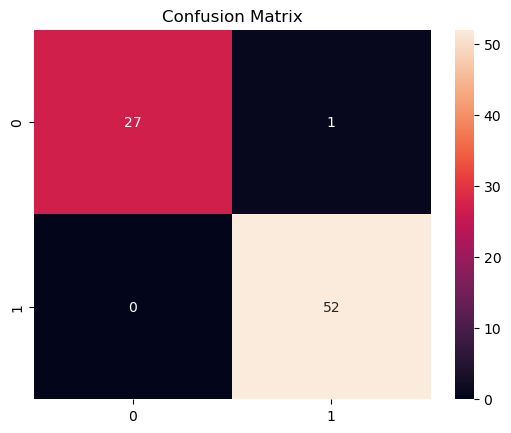

In [69]:
path = 'E:/Random Forest Project 9 & 10'
file_path = os.path.join(path, 'Confusion_Matrix.png')
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.title('Confusion Matrix')
plt.savefig(file_path)
plt.show()

In [70]:
# Model's accuracy is 98.75%